Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#For displaying .pdfs 
from IPython.display import IFrame

def display_pdf(pdf_path, width="100%", height="600px"):
    """Displays a PDF file within a Jupyter Notebook cell."""
    return IFrame(src=pdf_path, width=width, height=height)

#Print text file with colored line numbers
from colored import Fore, Back, Style, fore, back, style, attr

def display_file_with_colored_line_numbers(filepath, color=Fore.red):
    """
    Displays a text file with colored line numbers in a Jupyter Notebook.
    """
    try:
        with open(filepath, 'r') as f:
            for i, line in enumerate(f, 1):
                colored_line_num = f"{color}{i:4d}{attr(0)}{Style.reset}"  # Format line number
                print(f"{colored_line_num}: {line.rstrip()}") # Print line number and content
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")

#general libraries used
import numpy as np
import pandas as pd
import importlib as imp


Using SOURCES 4A (modified) to Estimate Radiogenic Neutron Sources
==================================================================

SOURCES is a computational code that takes levels of radioactive contamination in materials and outputs the neutron source strengths they induce in terms of ($\alpha$,n) and spontaneous fission (SF). The Radiation Safety Information Computational Center (RSICC)[[RSICC][RSICC]] maintains and distributes the SOURCES code. SOURCES has two released versions, first, SOURCES4A and then later SOURCES4C. The earlier version, SOURCES4A, has been usefully modified by Vitaly Kudryavtsev of Sheffield University [[SOURCES4Amod][SOURCES4Amod]] and is the preferred version for the rare-event/underground physics community [[Radiogenic Backgrounds][RADIOGENIC]].

[RADIOGENIC]: https://www.sciencedirect.com/science/article/pii/S0168900217312263?ref=pdf_download&fr=RR-2&rr=954f718d3d727b15 "SOURCES reference in underground physics/dark matter"
[RSICC]: https://www.ornl.gov/onramp/rsicc "Oak Ridge Computational Page"
[SOURCES4Amod]: https://www.sciencedirect.com/science/article/pii/S0168900220305088?via%3Dihub "Kudryavtsev modified SOURCES4A"

SOURCES4A (modified) Input Files
---------------------------------

The manual for SOURCES4A is attached below (in a collapsed output cell after the `display_pdf` excecution). Pages 26-30 show the input file specification for the so-called "homogeneous problem." A further sample problem--for characterizing a Pu/Be source--is shown on pg. 46. We will use the "homogeneous problem" case; a block of material has radioactive "sources" (isotopes) throughout it which can decay by SF or $\alpha$. The SF decays directly produce neutrons and the $\alpha$ decays find other "targets" on which to do ($\alpha$,n).

In [2]:
%%capture
display_pdf('SOURCES_manuals/SOURCES4A_manual.pdf')

The SOURCES4A (mod) input for 1 part per billion (ppb) of $^{232}$Th chain contamination is shown below. There are three stanzas that are relevant to our problem. 

The walls around our area in SNOLAB are made of "shotcrete" that is laid over the norite rock. The material composition of said is given in the SNOLAB Users Handbook (v2) [] and a separate SNOLAB report [SNOLAB-STR-2007-003]. This information makes up the first stanza starting on line 4 below and ending on line 14. In that stanza the leftmost numbers represent the atomic number (Z) of the elemental constituent of the bulk material; the rightmost numbers represent the **atom fraction** of each of those constituents. The sum of the atom fractions should be 1. The reference for the shotcrete composition is an internal SNOLAB document [SNOLAB-STR-2007-003]. The relevant table is reproduced below.

![Shotcrete](SOURCES_images/shotcrete_comp.png "Shotcrete Composition")

The `.pdf` file is for the SNOLAB document [SNOLAB-STR-2007-003] is in a collapsed cell below.

In [3]:
%%capture
display_pdf('SNOLAB_docs/SNOLAB-STR-2007-003-NoriteRock-Radioactivity.pdf')

The second stanza (lines 17 to 23 below) lists the specific radioactive isotopes that contaminate the material that we are simulating. The notebook in this directory `A-Decay-Chain-Modeling.ipynb` gives the details of finding the expected ratios of various radioactive isotopes given the assumption of **secular equilibrium**. The numbers on the leftmost side in this stanza encode the isotope number in the form atomic number (Z) times 10,000 plus mass number (A) times 10. For example $^{212}$Bi is encoded as `832120`. The rightmost number is the concentration of said radioactive isotopes in atoms/cm$^3$. Note that these isotopic concentrations are scaled to what is expected from 1 ppb of the parent in the chain, in this case, $^{232}$Th.

The third stanza (lines 25 to 48 below) lists the so-called "target" atoms. These are all potential isotopes present that can participate in ($\alpha$,n) reactions with alphas that are emitted from the radioactive isotopes that contaminate the material (stanza 2). Generally, these include all of the isotopes of the elements specified in stanza 1. In stanza 1 it was only important to specify the atomic number (Z) of the elements because that information is used to calculate how $\alpha$ particles slow down in the medium. In stanza 3 we must specify all the **specific** isotopes that those elements have. The details of the ($\alpha$,n) reaction depend on those specific isotopes, not just the elements. The isotopes included in stanza 3 will be all the stable isotopes of each element in stanza 1 with non-negligible isotopic abundances. Stanza 3 specifies each isotope with the leftmost number in the same format as stanza 2. The rightmost number is again the isotopic concentrations in atoms/cm$^3$. 

Below we show the three input files used for SOURCES4A (mod). The $^{232}$Th input text file is always shown but the uranium files are hidden by default. 

In [4]:
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-Th232-SNOLAB-1ppb',Fore.blue)

   1: Bulk Shotcrete problem 1ppb Th-232 in secular equilibrium
   2: 1 2 1
   3: 11 0
   4:  1   0.008369383
   5:  6   0.000702273
   6:  8   0.632664473
   7:  11  0.020638254
   8:  12  0.010237913
   9:  13  0.04720579
  10:  14  0.209482183
  11:  19  0.009492483
  12:  20  0.0501958
  13:  25  0.001420213
  14:  26  0.009591234
  15: 100 10.0 0.0
  16: 7
  17:  832120  5.201803E+00
  18:  842120  2.728439E-10
  19:  842160  2.073918E-04
  20:  862200  7.942659E-02
  21:  882240  4.469156E+02
  22:  902280  8.610849E+04
  23:  902320  6.346190E+14
  24: 24 4000
  25:  60130  8.989e-6
  26:  80170  2.426e-4
  27:  80180  1.294e-3
  28:  110230 2.064e-2
  29:  120240 8.084e-3
  30:  120250 1.025e-3
  31:  120260 1.129e-3
  32:  130270 4.721e-2
  33:  140280 1.933e-1
  34:  140290 9.787e-3
  35:  140300 6.438e-3
  36:  190390 8.853e-3
  37:  190400 1.111e-6
  38:  190410 6.389e-4
  39:  200420 3.248e-4
  40:  200430 6.776e-5
  41:  200440 1.047e-3
  42:  200460 2.008e-6
  43:  20048

In [5]:
%%capture
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-U238-SNOLAB-1ppb',Fore.blue)

In [6]:
%%capture
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-U235-SNOLAB-1ppb',Fore.blue)

SOURCES4A (modified) Output
---------------------------

The raw SOURCES4A (mod) output is given in a text file called "tape7." The print commands below are commented out. If the content is needed either uncomment and run the command or navagate to the relevant text file in this directory. The files are long, so viewing them in a separate text editor may be best. 

In [7]:
%%capture
display_file_with_colored_line_numbers('SOURCES_outputs/tape1-Th232-SNOLAB-1ppb_tape7',Fore.blue)
#display_file_with_colored_line_numbers('SOURCES_outputs/tape1-U238-SNOLAB-1ppb_tape7',Fore.blue)
#display_file_with_colored_line_numbers('SOURCES_outputs/tape1-U235-SNOLAB-1ppb_tape7',Fore.blue)

The raw SOURCES4A (mod) output is converted into a simpler form in the files `data/XXYYY_summary_1ppb_250609.txt` and read into a standard `pandas` data structure. In the data structure as read in below we can see the energy bins for each neutron source bin in units of MeV. Furthermore the source strengths in the three right columns are in units of neutrons/cm$^3$/s and broken out by the ($\alpha$,n) contribution, the spontaneous fission (SF) contribution, and the total. 

In [8]:
th232_chain = pd.read_csv("data/Th232_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (th232_chain.head(10))

   Energy           a,n          S.F.         Total
0    10.0  1.407000e-14  1.576000e-19  1.407000e-14
1     9.9  1.554000e-14  1.779000e-19  1.554000e-14
2     9.8  1.708000e-14  2.019000e-19  1.708000e-14
3     9.7  1.867000e-14  2.289000e-19  1.867000e-14
4     9.6  2.033000e-14  2.575000e-19  2.033000e-14
5     9.5  2.204000e-14  2.922000e-19  2.204000e-14
6     9.4  2.461000e-14  3.291000e-19  2.461000e-14
7     9.2  4.001000e-14  4.207000e-19  4.001000e-14
8     9.1  4.952000e-14  4.753000e-19  4.952000e-14
9     9.0  5.942000e-14  5.364000e-19  5.942000e-14


Below we change the data over to `numpy` arrays and set up for plotting in `matplotlib`. 

In [9]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232chainSFRn = np.asarray(th232_chain['S.F.'],dtype=float)

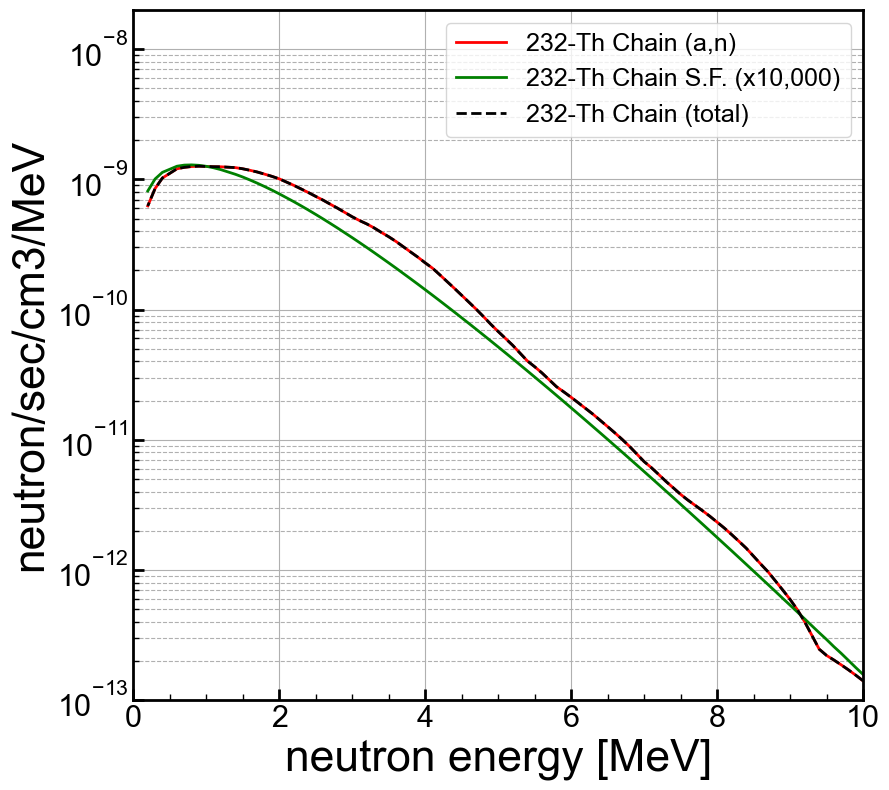

In [10]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(th232chainEn)[0])


ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232chainEn, 100000*th232chainSFRn/width,color='g',linestyle='-',label="232-Th Chain S.F. (x10,000)")
ax1.plot(th232chainEn, th232chainRn/width,color='k',linestyle='--',label="232-Th Chain (total)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

The output plot shows that for $^{232}$Th the ($\alpha$,n) contribution is dominant. The spontaneous fission contribution needs to be scaled by a factor of 10,000 to be close to the same contribution. 

Below we do the same plot for the uranium contributions. $^{238}$U and $^{235}$U are not considered to be independent contributions. $^{238}$U is naturally present at 99.27% and $^{235}$U is present at 0.72%. So, when we plot 1ppb of uranium we distribute it between the isotopes in this ratio. 

In [11]:
%%capture
u238_chain = pd.read_csv("data/U238_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (u238_chain.head(10))

u235_chain = pd.read_csv("data/U235_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (u235_chain.head(10))


In [12]:
u238_frac=0.9927
u235_frac=0.0072

u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_frac*u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_frac*u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_frac*u238_chain['S.F.'],dtype=float)

u235chainEn = np.asarray(u235_chain['Energy'],dtype=float)
u235chainRn = np.asarray(u235_frac*u235_chain['Total'],dtype=float)
u235chainANRn = np.asarray(u235_frac*u235_chain['a,n'],dtype=float)
u235chainSFRn = np.asarray(u235_frac*u235_chain['S.F.'],dtype=float)

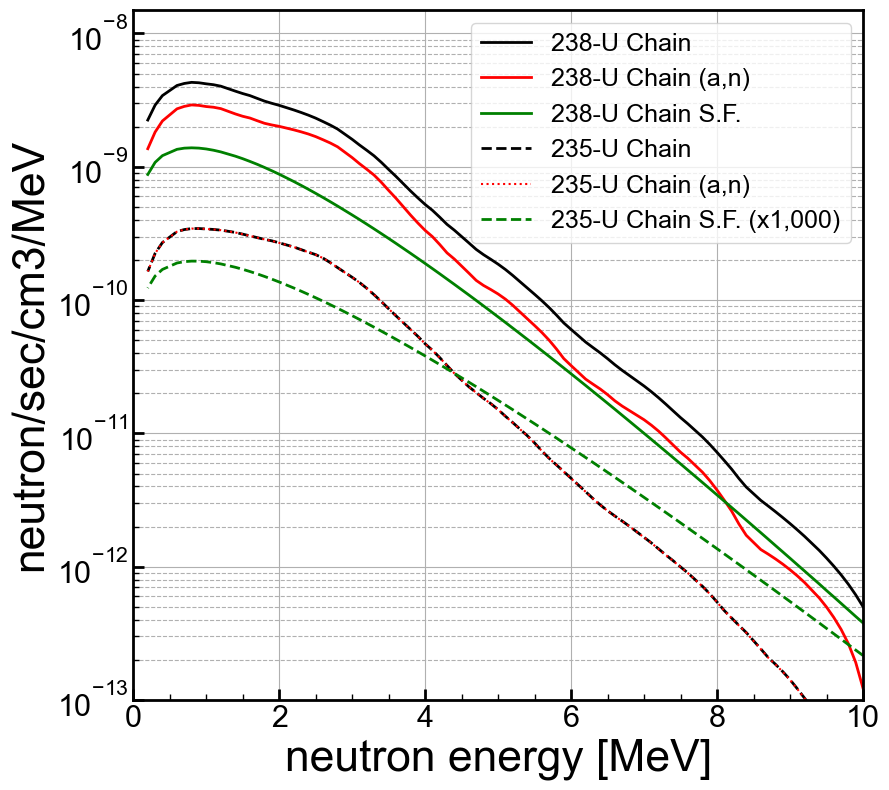

In [13]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
      

ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")

ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='--',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle=':',label="235-U Chain (a,n)", linewidth=1.5)
ax1.plot(u235chainEn, 1000*u235chainSFRn/width,color='g',linestyle='--',label="235-U Chain S.F. (x1,000)")


ymin = 1e-13
ymax = 1.5e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

The output plot shows that for $^{238}$U the ($\alpha$,n) and SF contributions are closer than in the other isotopes. In fact $^{238}$U SF is the only appreciable SF in this calculation. The $^{235}$U has no appreciable spontaneous fission (curve in plot multiplied by 1,000). The $^{235}$U ($\alpha$,n) contribution is also sub-dominant--this is because the natural abundance of this isotope is very low. 

Total Source Strengths
----------------------

Typically the two U source strengths are added together when plotted and considered together as a whole. 

In [14]:
uchainEn = u238chainEn
uchainRn = u238chainRn+u235chainRn
uchainANRn = u238chainANRn+u235chainANRn
uchainSFRn = u238chainSFRn+u235chainSFRn

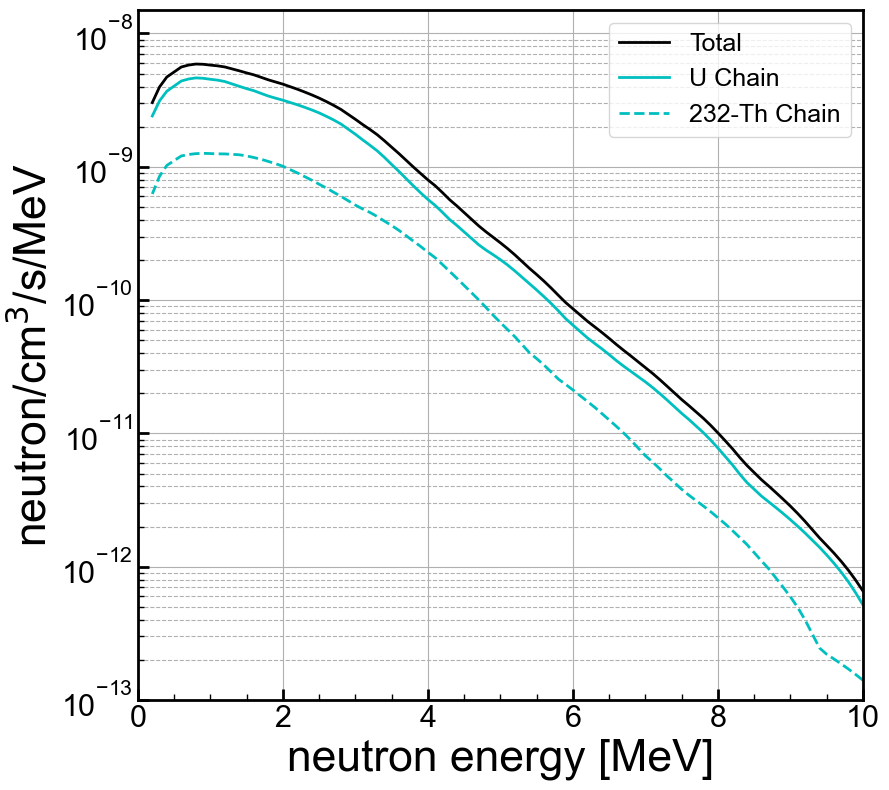

In [15]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
      
ax1.plot(uchainEn, (uchainRn+th232chainRn)/width,color='k',linestyle='-',label="Total")
ax1.plot(uchainEn, uchainRn/width,color='c',linestyle='-',label="U Chain")
ax1.plot(th232chainEn, th232chainRn/width,color='c',linestyle='--',label="232-Th Chain")


ymin = 1e-13
ymax = 1.5e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/cm$^3$/s/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

The U chain contribution is fairly dominant when both chains have equal contamination (1ppb), but there is a $\sim$20% contribution from the $^{232}$Th. As a final plot the results are shown on a log-log scale in the next section, typical for reporting fluxes and similar to the plotting style of the notebook `C-Slab-Source-and-Shielding.ipynb`.

Contamination Measurements and Final Spectrum
---------------------------------------------

Around 2006-2007 the previous reference [SNOLAB-STR-2007-003] reported on the assay of 37 individual samples from the area in and around SNOLAB. This was during the time SNOLAB proper was being constructed as an addition to the SNO experiment which was in place before in the Creighton mine. The results from assay of those samples are listed in Table 1 on pg. 6 of the document. The three key samples for us are "37 - Accelerated Shotcrete, April 6, 2006"; "16 - Shotcrete (cured, SNO entrance)"; and "15 - Accelerated Shotcrete March 8, 2005 (Batch 25017)." Relevant results are shown below.

| Sample | K (%) | U (ppm) [measured by $^{226}$Ra] | Th (ppm) [measured by $^{228}$Th]
| --- | --- | --- |---|
| 15 - Accelerated Shotcrete March 8, 2005 (Batch 25017) | 1.78 $\pm$ 0.05 | 2.46 $\pm$ 0.09 | 15.24 $\pm$ 0.14 |
| 16 - Shotcrete (cured, SNO entrance) | 1.39 $\pm$ 0.07 | 2.50 $\pm$ 0.10 | 6.33 $\pm$ 0.30 |
| 37 - Accelerated Shotcrete, April 6, 2006 | 1.85 $\pm$ 0.05 | 2.40 $\pm$ 0.08 | 16.69 $\pm$ 11.0 |

Most of the measurements seem plausibly consistent with the assumption that all samples have the same concentrations except for the Th concentrations on Sample 16. These results come from $\gamma$-ray spectroscopy with a High-Purity Germanium (HPGe) detector. The measurements come with the following warning.


>Because of the differences in the chemical properties of the progeny, they may or may
>not be in secular equilibrium with the parent uranium and thorium in natural materials.
>It is almost always certain that the radioactive equilibrium is disturbed by anthropogenic
>processes. In this sense, the concentrations determined by gamma-ray spectrometry are
>reported as equilibrium equivalent values of Uranium and Thorium with respect to the
>radioactive progeny employed in the measurement.

Basically, what it means is secular equilibrium cannot be guaranteed but the results are reported in terms of secular equilibrium values. In other words, if one measures a certain concentration of $^{226}$Ra with the HPGe detector, the value that is quoted for the U chain is the corresponding concentration of the uranium **assuming secular equilibrium**. 

There are also some historical measurements that date back to the early 90's and the construction of the SNO neutrino detector (before the full SNOLAB was built). The reference for those is a SNOLAB technical report [[SNO-STR-91-082][SNO-STR-91-082]] by Hallman and Cuff. **Note** that reference does not seem to be accessible on the web so I linked to the general SNOLAB technical report repository hosted by Queens University. Oddly the available report numbers go from 079 to 083, skipping 080, 081, and 082.

The quoted numbers from those measurements are:

| Sample | K (%) | U (ppm) [measured by $^{226}$Ra] | Th (ppm) [measured by $^{228}$Th]
| --- | --- | --- |---|
| shotcrete (11/10/91) | 1.337 $\pm$ 0.008 | 2.053 $\pm$ 0.094 | 5.976 $\pm$ 0.116 |

Those measurements were using a Ge detector and taken during SNO construction.

Another historical report from 1994 also exists [[SNO-STR-94-015][SNO-STR-94-015]]. This one does have a direct link and can be corroborated separately from our main reference [SNOLAB-STR-2007-003]. These were rock samples, not shotcrete so we won't say more about them. 

In [SNOLAB-STR-2007-003] the results were also cross-checked with an Inductively Coupled Plasma Mass Spectroscopy (ICP-MS) measurement. Shotcrete Sample 15 result comparisons are shown in the table below.

| Contaminant | HPGe measurment (Sample 15) | ICP-MS (Sample 15) |
| --- | --- | --- |
| K (%) | 1.78 $\pm$ 0.05 | 1.76 |
| U (ppm) | 2.46 $\pm$ 0.09 | 2.56 |
| Th (ppm) | 15.24 $\pm$ 0.14 | 14.9 |

Since Samples 15 & 37 are rather consistent, and the most relevant (shotcrete from around when SNOLAB was constructed but away from SNO entrance), we will use those. Furthermore, Sample 15 has fairly consistent ICP-MS comparisons--a good cross-check. 

Below we plot those results on a log-log scale in terms of the resulting volumetric neutron sources in the shotcrete implied by these measurements and SOURCES4A (mod). 

[SNO-STR-91-082]: https://sno.phy.queensu.ca/str/index.html "SNOLAB technical reports hosted by Queens University"
[SNO-STR-94-015]: https://sno.phy.queensu.ca/str/SNO-STR-94-015.pdf "SNOLAB technical report SNO-STR-94-015"


In [16]:
#get variables describing the contamination results
u_mid = 2.46e3 #in ppb
u_sig = 0.09e3
u_range = (u_mid+u_sig,u_mid-u_sig)
th_mid = 15.24e3
th_sig = 0.14e3
th_range = (th_mid+th_sig,th_mid-th_sig)


#we can use these pieces to define the upper and lower intervals for the sum
#we add the uncertainties for the two in quadrature
sumEn = uchainEn
sumRn = th_mid*(th232chainRn) + u_mid*(uchainRn)
sumsig = np.sqrt(u_sig**2*(uchainRn)**2 + th_sig**2*(th232chainRn)**2)

#multiply ultimate uncertainties times 10 so visible
sumUp = sumRn+sumsig*10
sumDn = sumRn-sumsig*10


#moving to log-log scale will require a transformation on the values to account for the change in size of energy bins
#we call this factor "jac" after Jacobian
jac = 1/(th232chainEn*np.log(10))

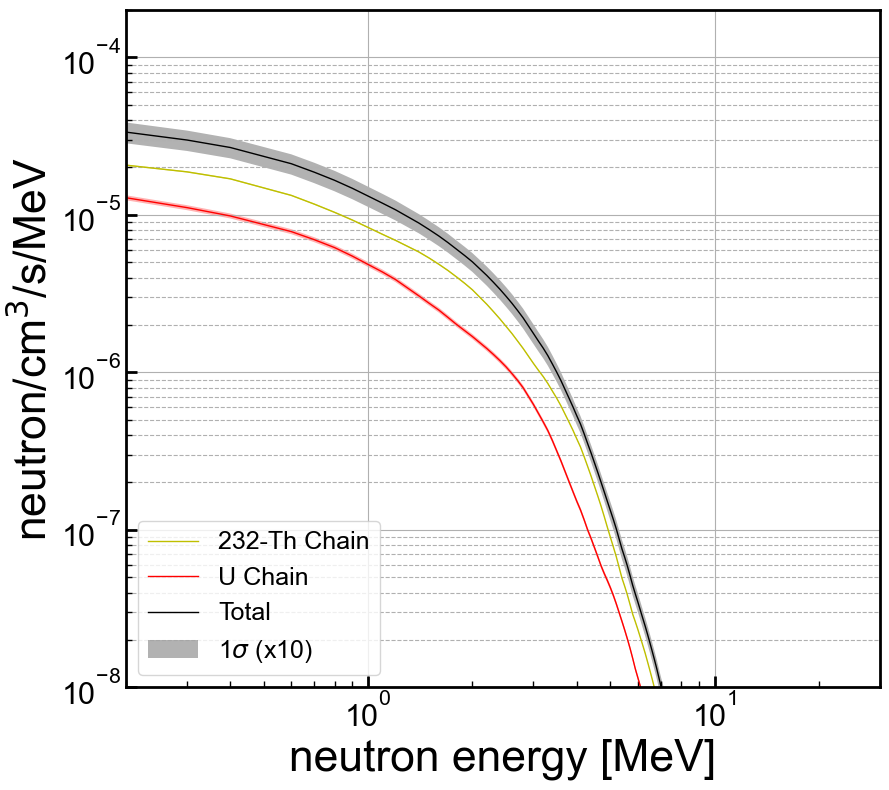

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.plot(th232chainEn, th_mid*jac*th232chainRn/width,color='y',linestyle='-',label="232-Th Chain",linewidth=1)
ax1.plot(uchainEn, u_mid*jac*uchainRn/width,color='r',linestyle='-',label="U Chain",linewidth=1)
ax1.plot(sumEn, jac*sumRn/width,color='k',linestyle='-',label="Total",linewidth=1)

ymin = 1e-8
ymax = 2e-4

#shade in 1-sigma uncertainty bands
ax1.fill_between(th232chainEn,th_range[0]*jac*th232chainRn/width,th_range[1]*jac*th232chainRn/width, \
                 facecolor='y',alpha=0.5,label='')
ax1.fill_between(uchainEn,u_range[0]*jac*uchainRn/width,u_range[1]*jac*uchainRn/width, \
                 facecolor='r',alpha=0.3,label='')
ax1.fill_between(sumEn,jac*sumUp/width,jac*sumDn/width, \
                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.2, 30) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/cm$^3$/s/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

After including the correct contamination measurements, the Th chain contribution is around 1.5x larger than the U contribution but they are on the same order of magnitude. The lowest neutron energy we plot to (0.2 MeV) is the lowest energy the SOURCES4A (mod) code outputs. The shading in the above represents the 1$\sigma$ statistical region. It is only slightly visible, mostly on the low-energy U chain curve. The uncertainty on the sum is multiplied x10 so it is visible. 

Library Function to get Source Strengths
----------------------------------------

It is convenient to be able to get the function for the volumetric neutron sources as a function of energy (as in the plot just above) from a library function. 

In [18]:
import flux_recoil_spec as frs
imp.reload(frs)

src=frs.SNOLAB_shotcrete_source()

The code above accesses the dictionary `flux_recoil_spec` library stored in the directory `python/` relative to the top of this code repository. Inside that library file the function `SNOLAB_shotcrete_source` is used (no inputs) and returns a dictionary of `numpy` arrays specified by the following keys:

key name |Description 
:-|:-
`E`|`numpy.shape=(87,)` Neutron energy values in MeV corresponding to elements of all other vectors
`tot`|`numpy.shape=(87,)` Volumetric neutron source summed over all types (U,Th) in units of neutron/cm$^3$/s/MeV
`totUp`|`numpy.shape=(87,)` Upper uncertainty of total volumentric neutron source in units of neutron/cm$^3$/s/MeV
`totDn`|`numpy.shape=(87,)` Lower uncertainty of total volumentric neutron source in units of neutron/cm$^3$/s/MeV
`thtot`|`numpy.shape=(87,)` Volumetric neutron source from Th contamination in units of neutron/cm$^3$/s/MeV
`thtotUp`|`numpy.shape=(87,)` Upper uncertainty of Th volumentric neutron source in units of neutron/cm$^3$/s/MeV
`thtotDn`|`numpy.shape=(87,)` Lower uncertainty of Th volumentric neutron source in units of neutron/cm$^3$/s/MeV
`utot`|`numpy.shape=(87,)` Volumetric neutron source from U contamination in units of neutron/cm$^3$/s/MeV
`utotUp`|`numpy.shape=(87,)` Upper uncertainty of U volumentric neutron source in units of neutron/cm$^3$/s/MeV
`utotDn`|`numpy.shape=(87,)` Lower uncertainty of U volumentric neutron source in units of neutron/cm$^3$/s/MeV



**NB**: The values returned are for log-log plotting only. 

Below is a reproduction of the previous plot using the dictionary output from the function `SNOLAB_shotcrete_source`. 


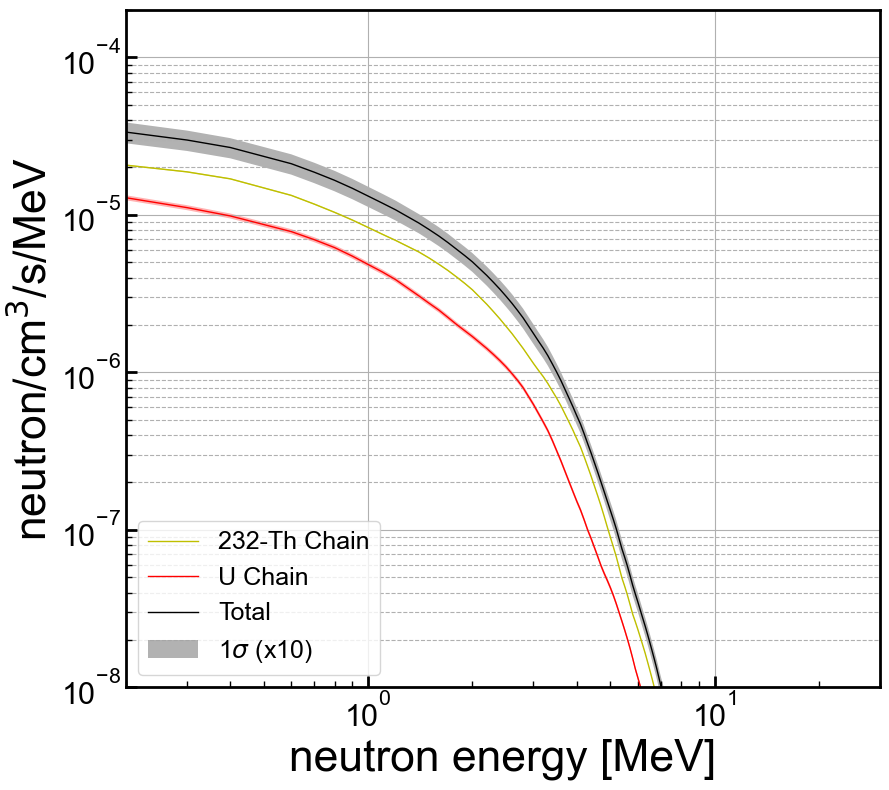

In [19]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.plot(src['E'], src['thtot'],color='y',linestyle='-',label="232-Th Chain",linewidth=1)
ax1.plot(src['E'], src['utot'],color='r',linestyle='-',label="U Chain",linewidth=1)
ax1.plot(src['E'], src['tot'],color='k',linestyle='-',label="Total",linewidth=1)

ymin = 1e-8
ymax = 2e-4

#shade in 1-sigma uncertainty bands
ax1.fill_between(src['E'],src['thtotUp'],src['thtotDn'], \
                 facecolor='y',alpha=0.5,label='')
ax1.fill_between(src['E'],src['utotUp'],src['utotDn'], \
                 facecolor='r',alpha=0.3,label='')
ax1.fill_between(src['E'],src['totUp'],src['totDn'], \
                 facecolor='k',alpha=0.3,label='1$\sigma$ (x10)')


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.2, 30) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/cm$^3$/s/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()